# Generating Paths

#### Imports

In [242]:
import os, sys
import datetime as dt
import six

[autoreload of src.models.gbm failed: Traceback (most recent call last):
  File "C:\Users\pace8\PycharmProjects\Paths-Generation\venv\Lib\site-packages\IPython\extensions\autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\pace8\PycharmProjects\Paths-Generation\venv\Lib\site-packages\IPython\extensions\autoreload.py", line 500, in superreload
    update_generic(old_obj, new_obj)
  File "C:\Users\pace8\PycharmProjects\Paths-Generation\venv\Lib\site-packages\IPython\extensions\autoreload.py", line 397, in update_generic
    update(a, b)
  File "C:\Users\pace8\PycharmProjects\Paths-Generation\venv\Lib\site-packages\IPython\extensions\autoreload.py", line 349, in update_class
    if update_generic(old_obj, new_obj):
       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\pace8\PycharmProjects\Paths-Generation\venv\Lib\site-packages\IPython\extensions\autoreload.py", line 397, in update_generic
    update(a, b)
  File "C:\Users\pace8\PycharmProj

In [243]:
import numpy as np
import pandas as pd

In [244]:
sys.path.append(os.path.abspath('../'))

In [245]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [246]:
# Import local classes
from src.models.gbm import *
from src.models.ou import OrnsteinUhlenbeckProcess
from src.models.bridge import BrownianBridge

### Testing the Ornstein Uhlenbeck

In [247]:
ou = OrnsteinUhlenbeckProcess(volatility=0.05, long_term_mean=0.15, mean_reversion=5.0, initial_value=0.050)

<Axes: >

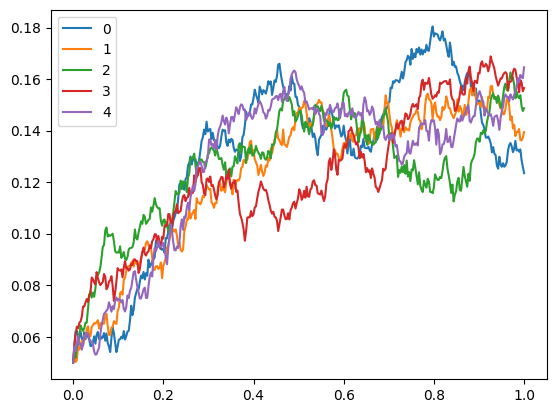

In [248]:
ou_paths = ou.generate(100, regenerate=True)
ou_paths.iloc[:, 0:5].plot()

<Axes: >

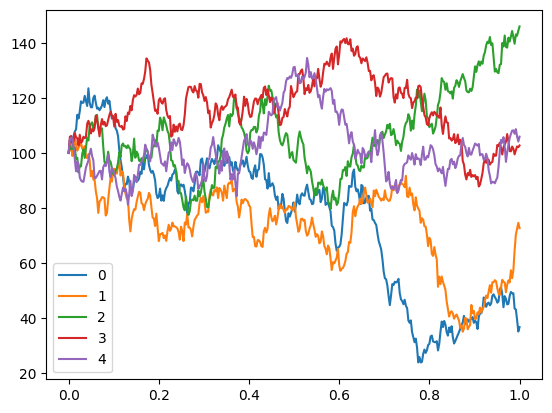

In [249]:
ou_output = OrnsteinUhlenbeckProcess(volatility=50., long_term_mean=100.00, mean_reversion=1.0, initial_value=100.0)
ou_output_paths = ou_output.generate(1000, regenerate=True)
ou_output_paths.iloc[:, 0:5].plot()


In [250]:
df_out = ou_output.to_datetime_index()

In [251]:
df_out.to_csv('../data/ou.csv', index=True, index_label='Date')

In [252]:
df_out.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2024-04-08 14:46:41.791931,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2024-04-09 14:46:41.791931,104.610419,101.045826,102.557970,105.856661,104.880935,97.445847,102.483093,99.604422,99.730234,101.073115,...,101.152657,100.467282,97.910679,100.629307,100.755628,101.079054,99.481477,100.246175,97.000674,99.064055
2024-04-10 14:46:41.791931,106.050835,103.375480,101.447235,106.114311,105.463607,97.979410,103.889632,94.853888,99.602061,101.694903,...,104.658497,98.532153,101.353558,99.782217,101.270592,101.331577,103.145831,100.659575,94.024477,95.640344
2024-04-11 14:46:41.791931,102.027932,98.891945,101.563851,103.592834,105.237454,96.145376,101.864515,93.611260,101.441998,104.118622,...,103.755685,95.130153,102.569726,100.203871,102.103531,106.761942,100.765527,100.154914,90.871869,95.441625
2024-04-12 14:46:41.791931,106.186465,100.381354,101.260356,104.240650,102.058507,95.126884,102.082225,93.888583,97.437728,104.963609,...,99.907776,96.650126,102.733374,98.181707,103.129988,105.426506,105.414379,100.074588,95.018625,93.329807


In [253]:
ou.theoretical_expectation()

0.14932620530009144

In [254]:
ou_paths.iloc[-1, :].mean()

0.14756271685072492

In [255]:
ou.theoretical_std_dev()

0.01581102937880894

In [256]:
ou_paths.iloc[-1, :].std()

0.015249604846758084

### Testing the Geometric Brownian Motion

In [257]:
gbm = GeometricBrownianMotion(volatility=0.25, initial_value=1.0, maturity=1.0, time_intervals=365)

<Axes: >

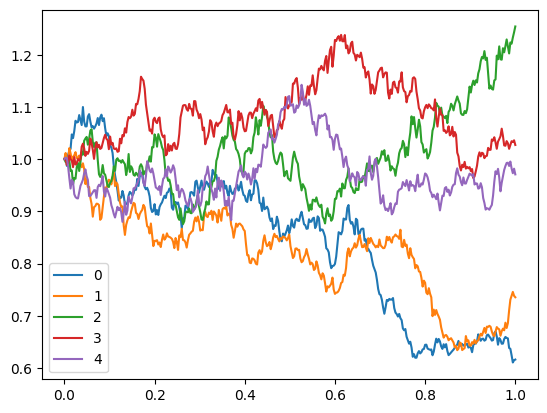

In [258]:
df_gbm = gbm(1000)
df_gbm.iloc[:, 0:5].plot()

In [259]:
np.mean(df_gbm.iloc[-1, :])

1.0072611387293624

In [260]:
gbm.theoretical_expectation()

1.0

In [261]:
df_gbm.iloc[-1, :].std()

0.2423000408197465

In [262]:
gbm.theoretical_std_dev()

0.2539575927548915

### Testing the OHLC Candle generator for the GBM

In [263]:
gbm_ohlc = GeometricBrownianMotionCandle(volatility=0.5, 
                                         sampling_rate=24, 
                                         drift=0.10, 
                                         time_intervals=365, 
                                         maturity=1)


In [264]:
df_gbm_ohlc = gbm_ohlc(5)
type(df_gbm_ohlc)

dict

In [265]:
df_gbm_ohlc.head()

AttributeError: 'dict' object has no attribute 'head'

### Testing the Brownian Bridge

In [ ]:
bb = BrownianBridge(0.25)

In [ ]:
paths_bb = bb.generate(1000)

In [ ]:
paths_bb.iloc[:, 0:5].plot()

In [ ]:
paths_bb.iloc[0,:].mean()

In [ ]:
paths_bb.iloc[-1,:].mean()

In [ ]:
paths_bb.std(axis=1).plot()